# Question 1

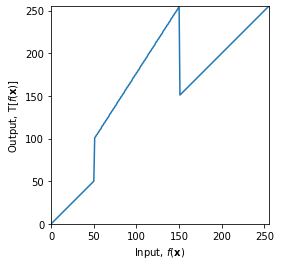

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])
#c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], 0).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0]-c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], 0).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, 255, 255-c[3, 0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


# Question 2

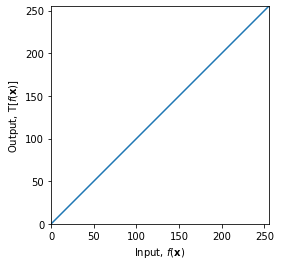

In [2]:
# Part a)
transform = np.arange(0, 256).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


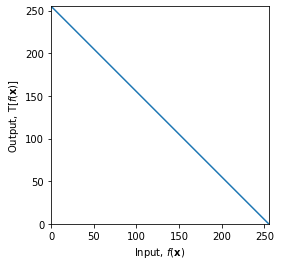

In [3]:
# Part b)
transform = np.arange(255, -1, -1).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

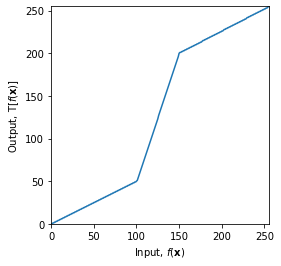

In [4]:
c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, 255, 255 - c[1, 0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 3

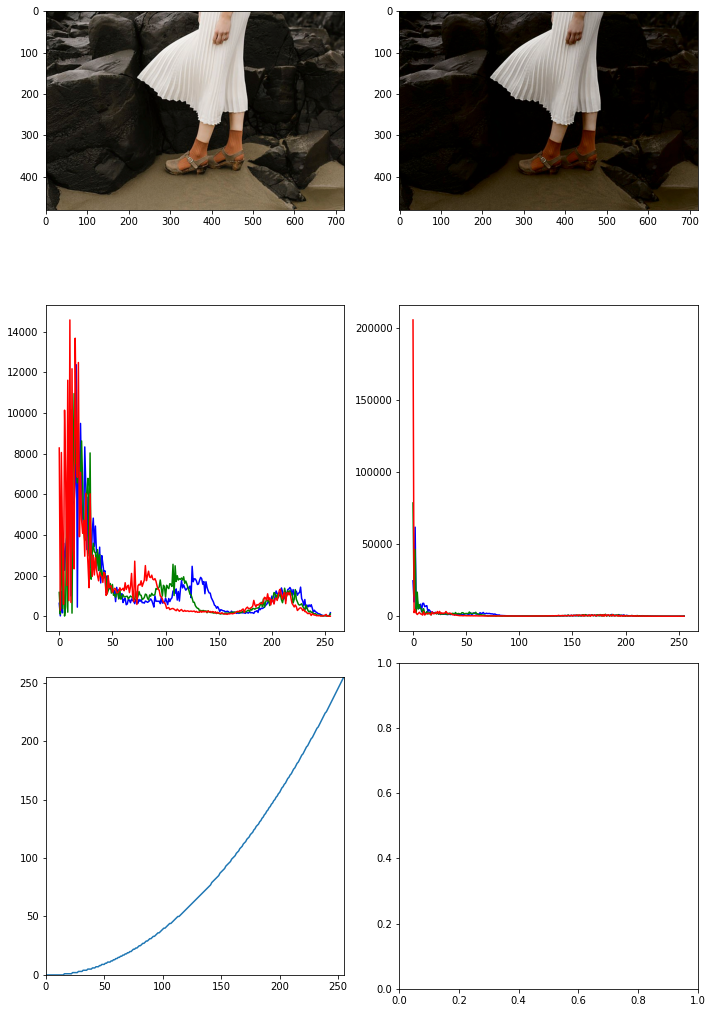

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv2.imread('highlights_and_shadows.jpg', cv2.IMREAD_COLOR)
gamma = 2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2LAB)
L, a, b = cv2.split(img_orig)
gamma_L = cv2.LUT(L, table)
img_gamma = cv2.merge((gamma_L, a, b))
img_gamma = cv2.cvtColor(img_gamma, cv2.COLOR_LAB2RGB)
img_orig = cv2.cvtColor(img_orig, cv2.COLOR_LAB2RGB)

fig, axarr = plt.subplots(3, 2, figsize=(10, 15))  # Adjust width and height as needed
axarr[0, 0].imshow(img_orig)
axarr[0, 1].imshow(img_gamma)
color = ('b', 'g', 'r')

for i, c in enumerate(color):
    hist_orig = cv2.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    hist_gamma = cv2.calcHist([img_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

axarr[2, 0].plot(table)
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')

plt.tight_layout()  # Adjusts spacing between subplots for better visibility
plt.show()


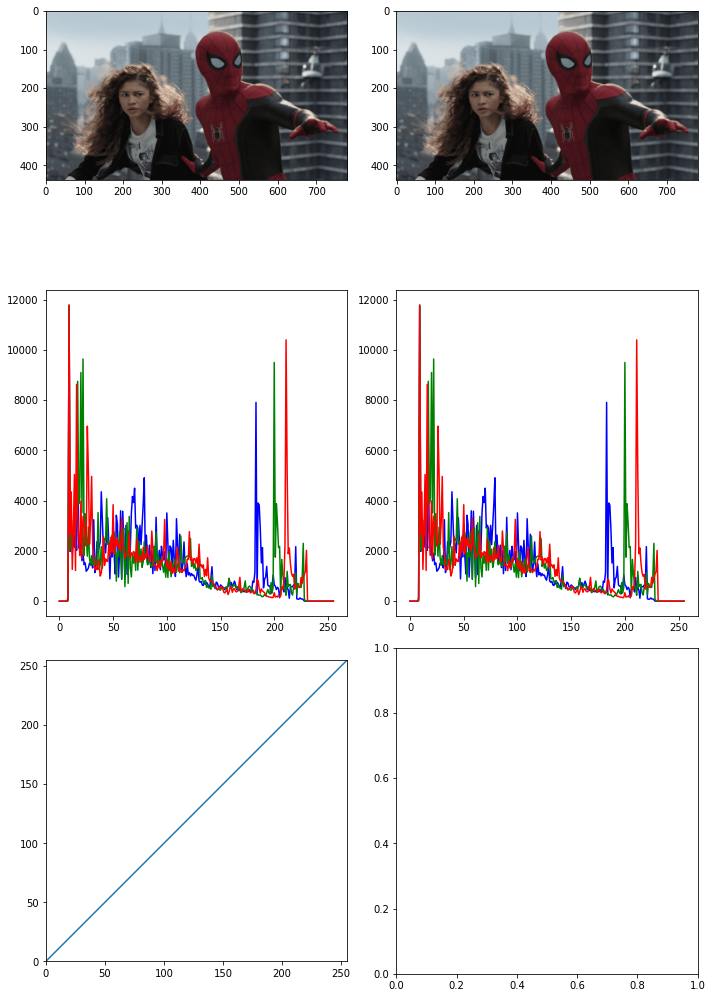

Image Dimensions (height, width): 438 780


In [6]:
from math import exp, pow

a = 0.5

img_orig = cv.imread('spider.png', cv.IMREAD_COLOR)
formula = np.array([min(i+(a/128)*exp(-pow((i-128),2)/(2*pow(70,2))), 255) for i in np.arange(0,256)]).astype('uint8')
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
H, S, V = cv.split(img_orig)
transform_S = cv.LUT(S, formula)
img_transform = cv.merge((H, transform_S, V))
img_transform = cv.cvtColor(img_transform, cv.COLOR_HSV2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_HSV2RGB)

fig, axarr = plt.subplots(3, 2, figsize=(10, 15))  # Adjust width and height as needed
axarr[0, 0].imshow(img_orig)
axarr[0, 1].imshow(img_transform)
color = ('b', 'g', 'r')

for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([img_transform], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

axarr[2, 0].plot(formula)
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')

plt.tight_layout()  # Adjusts spacing between subplots for better visibility
plt.show()
height, width = img_orig.shape[:2]

print("Image Dimensions (height, width):", height, width)


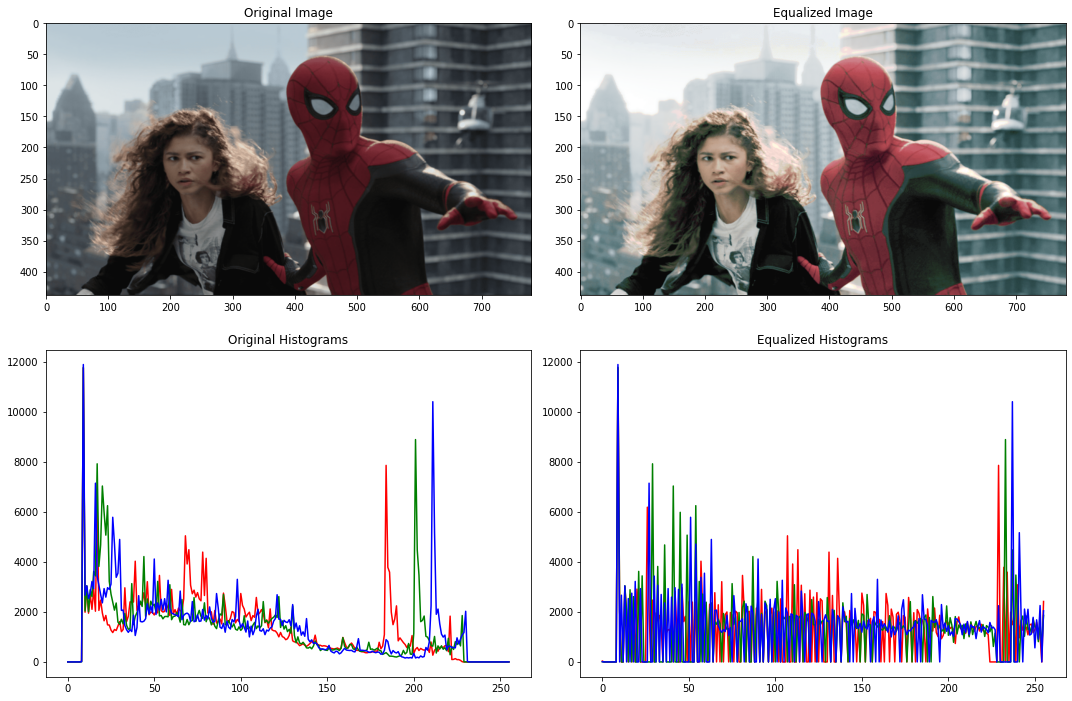

In [58]:
img_orig = cv.imread('spider.png', cv.IMREAD_COLOR)
def histogram_equalization(img_orig):
    B, G, R = cv.split(img_orig)
    height, width = img_orig.shape[:2]
    MN = height * width
    L = 256
    color = ('b', 'g', 'r')
    color_palate = np.array([])

    for i, c in enumerate(color):
        hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
        np.set_printoptions(precision=8, suppress=True)
        hist_cumsum = np.cumsum(hist_orig)
        hist_cumsum = hist_cumsum * ((L-1) / MN)
        rounded_array = np.round(hist_cumsum).astype(int)
        color_palate = np.append(color_palate, rounded_array)
    equalize_B = cv.LUT(B, color_palate[0:256])
    equalize_G = cv.LUT(G, color_palate[256:512])
    equalize_R = cv.LUT(R, color_palate[512:768])

    img_equalize = cv.merge((equalize_B, equalize_G, equalize_R))
    img_equalize = img_equalize.astype(np.uint8)  # Convert to np.uint8
    img_equalize = cv.cvtColor(img_equalize, cv.COLOR_BGR2RGB)
    img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

    fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
    axarr[0, 0].imshow(img_orig)
    axarr[0, 0].set_title('Original Image')
    axarr[0, 1].imshow(img_equalize)
    axarr[0, 1].set_title('Equalized Image')
    color = ('r', 'g', 'b')

    for i, c in enumerate(color):
        hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
        axarr[1, 0].plot(hist_orig, color=c)
        axarr[1, 0].set_title('Original Histograms')
        hist_equalize = cv.calcHist([img_equalize], [i], None, [256], [0, 256])
        axarr[1, 1].plot(hist_equalize, color=c)
        axarr[1, 1].set_title('Equalized Histograms')
    plt.tight_layout()  # Adjusts spacing between subplots for better visibility
    plt.show()
    return

histogram_equalization(img_orig)


# Question 6

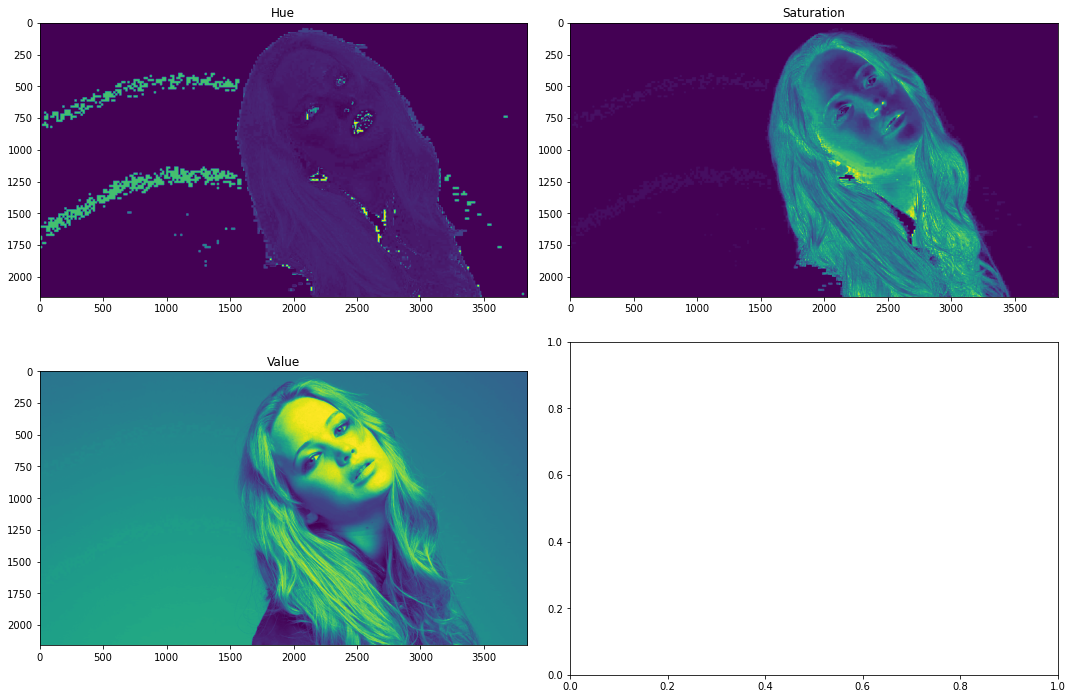

In [49]:
img_orig = cv.imread("jeniffer.jpg", cv.IMREAD_COLOR)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
H, S, V = cv.split(img_orig)

fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
axarr[0, 0].imshow(H)
axarr[0, 0].set_title('Hue')
axarr[0, 1].imshow(S)
axarr[0, 1].set_title('Saturation')
axarr[1, 0].imshow(V)
axarr[1, 0].set_title('Value')
plt.tight_layout()
plt.show()


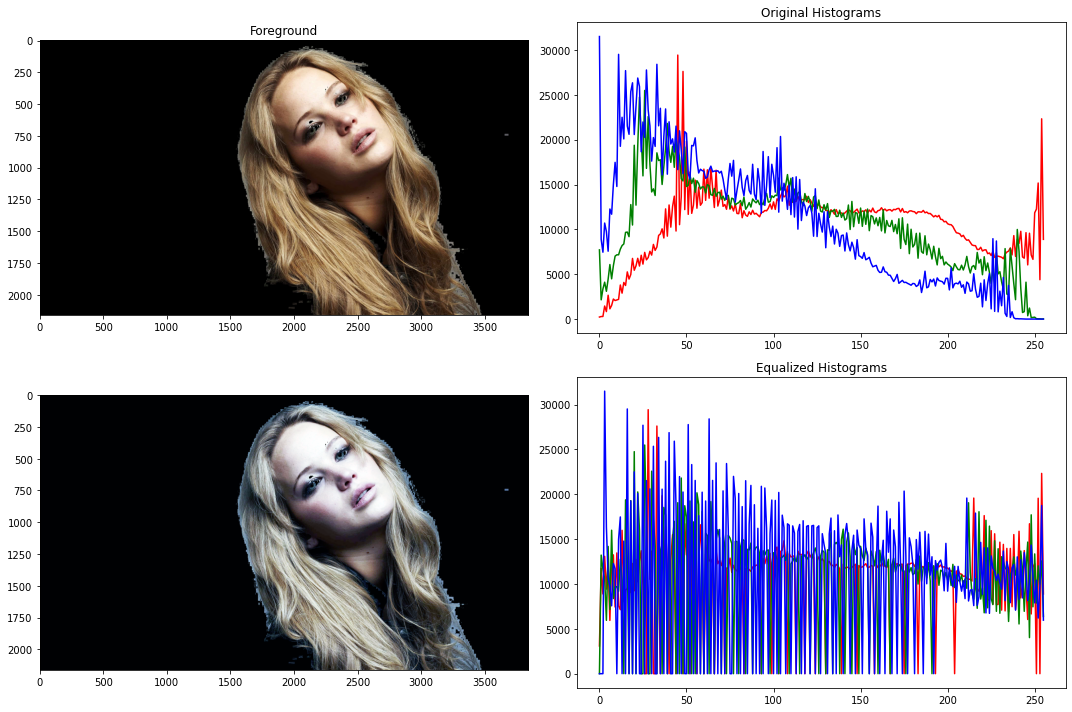

In [54]:
# selecting saturation plane for make the mask
mask = S > 11
mask = mask.astype(np.uint8) * 255
H_mask = cv.bitwise_and(H, mask)
S_mask = cv.bitwise_and(S, mask)
V_mask = cv.bitwise_and(V, mask)
img_fore = cv.merge((H_mask, S_mask, V_mask))
img_fore = cv.cvtColor(img_fore, cv.COLOR_HSV2RGB)
R_mask, G_mask, B_mask = cv.split(img_fore)

fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
axarr[0,0].imshow(img_fore)
axarr[0,0].set_title('Foreground')
color = ('r', 'g', 'b')
color_palate = np.array([])

for i, c in enumerate(color):
    hist_fore = cv.calcHist([img_fore], [i], mask, [256], [0, 256])
    axarr[0,1].plot(hist_fore, color=c)
    axarr[0,1].set_title('Original Histograms')
    
    np.set_printoptions(precision=8, suppress=True)
    hist_cumsum = np.cumsum(hist_fore)
    hist_cumsum = hist_cumsum * (255 / np.sum(hist_fore))
    rounded_array = np.round(hist_cumsum).astype(int)
    color_palate = np.append(color_palate, rounded_array)

equalize_R = cv.LUT(R_mask, color_palate[0:256])
equalize_G = cv.LUT(G_mask, color_palate[256:512])
equalize_B = cv.LUT(B_mask, color_palate[512:768])
img_fore_equalize = cv.merge((equalize_R, equalize_G, equalize_B))
img_fore_equalize = img_fore_equalize.astype(np.uint8)  # Convert to np.uint8
axarr[1,0].imshow(img_fore_equalize)

for i, c in enumerate(color):
    hist_equalize = cv.calcHist([img_fore_equalize], [i], mask, [256], [0, 256])
    axarr[1, 1].plot(hist_equalize, color=c)
    axarr[1, 1].set_title('Equalized Histograms')

plt.tight_layout()
plt.show()

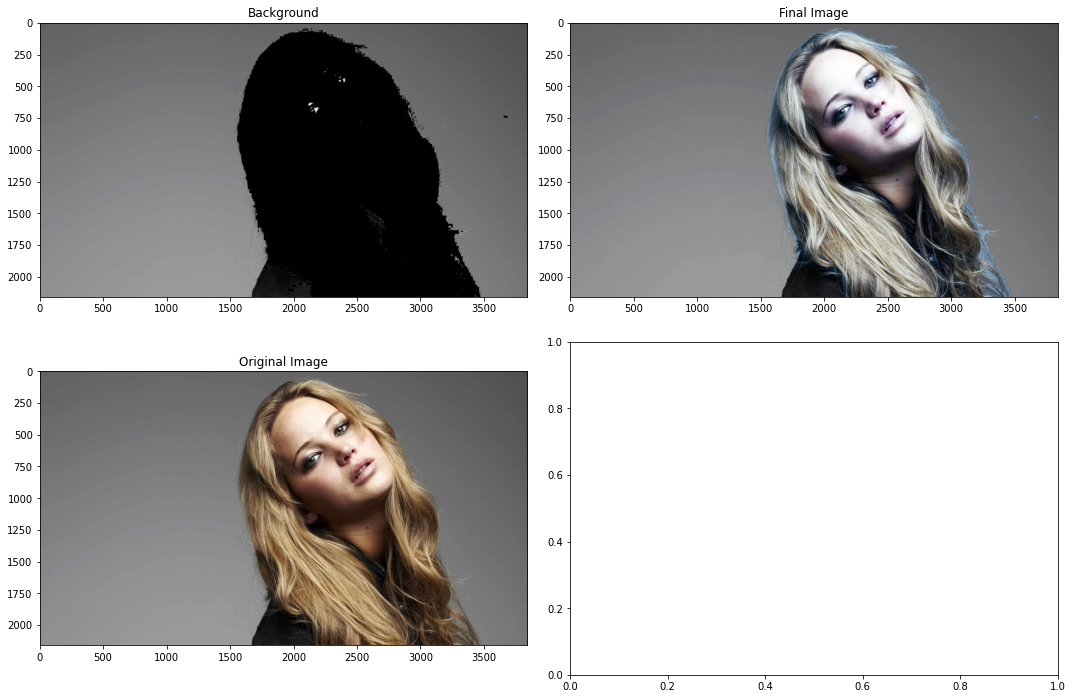

In [61]:
mask_back = S < 11.1
mask_back = mask_back.astype(np.uint8) * 255
H_mask_back = cv.bitwise_and(H, mask_back)
S_mask_back = cv.bitwise_and(S, mask_back)
V_mask_back = cv.bitwise_and(V, mask_back)
img_back = cv.merge((H_mask_back, S_mask_back, V_mask_back))
img_back = cv.cvtColor(img_back, cv.COLOR_HSV2RGB)
R_mask_back, G_mask_back, B_mask_back = cv.split(img_back)

fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
axarr[0, 0].imshow(img_back)
axarr[0, 0].set_title('Background')
color = ('r', 'g', 'b')

img_final = cv.add(img_fore_equalize, img_back)
axarr[0, 1].imshow(img_final)
axarr[0, 1].set_title('Final Image')

img_orig = cv.imread("jeniffer.jpg", cv.IMREAD_COLOR)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
axarr[1, 0].imshow(img_orig)
axarr[1, 0].set_title('Original Image')

plt.tight_layout()
plt.show()

# Question 7

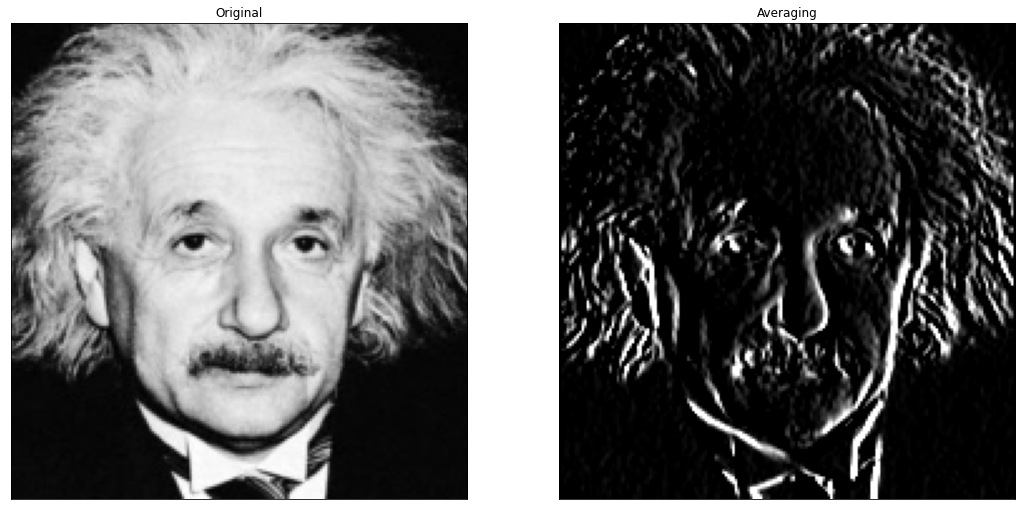

In [66]:
# Load the image
img = cv.imread('einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Define the convolutional kernel
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]], dtype='float32')

# Apply the 2D convolution filter
imgc = cv.filter2D(img, -1, kernel)

# Create subplots to show the original and filtered images
fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(18, 18))

# Display the original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
#axes[0].set_xticks([]), axes[0].set_yticks([])

# Display the filtered image
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])

# Show the plots inline
plt.show()

# Question 8

In [78]:
import cv2
import numpy as np

def zoom_nearest_neighbor(image, scale_factor):
    height, width = image.shape[:2]
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    zoomed_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for y in range(new_height):
        for x in range(new_width):
            original_y = int(y / scale_factor)
            original_x = int(x / scale_factor)
            zoomed_image[y, x] = image[original_y, original_x]
    
    return zoomed_image

# Load the image
image_path = './zooming/im01small.png'
image = cv2.imread(image_path, cv.IMREAD_COLOR)

# Zoom using nearest-neighbor interpolation
scale_factor = 4.0  # You can adjust the zoom factor
zoomed_nearest = zoom_nearest_neighbor(image, scale_factor)

# Zoom using bilinear interpolation
zoomed_bilinear = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

# Display the original, nearest-neighbor zoomed, and bilinear zoomed images
cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.imshow('Nearest-Neighbor Zoom', zoomed_nearest)
cv2.waitKey(0)
cv2.imshow('Bilinear Zoom', zoomed_bilinear)
cv2.waitKey(0)
cv2.destroyAllWindows()

orig_large = cv2.imread('./zooming/im01.png', cv2.IMREAD_COLOR)

def normalizedSumOfSquare(image1, image2):
    image1 = image1.astype(np.float64)
    image2 = image2.astype(np.float64)
    return np.sum(np.square(image1 - image2))

print("SSD between original large image and nearest neighbor zoom: ", normalizedSumOfSquare(orig_large, zoomed_nearest))
print("SSD between original large image and bilinear interpolation zoom: ", normalizedSumOfSquare(orig_large, zoomed_bilinear))



SSD between original large image and nearest neighbor zoom:  847702500.0
SSD between original large image and bilinear interpolation zoom:  715963699.0


SSD between original large image and bilinear interpolation zoom is lesser than The SSD value original large image and nearest neighbor zoom. So, the bilenear interpolation is better for zoom.

# Question 9